In [241]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore')

In [242]:
data = pd.read_csv('Data/Macronomics_data.csv',index_col=0).sort_index(ascending=True)
data.index = pd.to_datetime(data.index)
data = data.dropna()
# for c in data.columns:
#     data[c] = (data[c] - data[c].rolling(12,min_periods=1).mean())
data

,交易金額比重(外資),交易金額比重(投信),交易金額比重(自營),M1A,M1B,M2
年月,,,,,,
2000-04-01,3.5,3.3,1.8,18570,46375,181348
2000-05-01,4.1,3.5,1.8,18131,44730,179856
2000-06-01,4.8,4.2,2.2,18768,45341,181637
2000-07-01,5.2,4.4,2.0,17882,44179,181246
2000-08-01,5.4,4.8,2.0,18255,44361,182138
...,...,...,...,...,...,...
2024-12-01,34.1,4.1,4.5,115590,278455,640405
2025-01-01,34.7,2.7,5.1,114638,280708,646638
2025-02-01,36.1,2.3,4.7,115686,280013,650184


In [247]:
df_range = data.loc['2000-01-01':]

In [248]:
n=25
df_result = pd.DataFrame()
for i in tqdm(range(n-1,len(df_range))):
    row = df_range.iloc[i]
    yt = row[df_range.columns[:]]
    d = np.matrix(df_range.iloc[:i-1,:]).T
    cov_matrix = np.cov(d)
    mean = df_range.iloc[i-n:i-1,:].mean()
    diff = yt-mean
    # print((np.matrix(diff)*cov_matrix*(np.matrix(diff).T))[0,0])
    df_result.loc[row.name,'I'] = (np.matrix(diff)*cov_matrix*(np.matrix(diff).T))[0,0]
df_result

100%|██████████| 277/277 [00:00<00:00, 898.21it/s]


,I
2002-04-01,NaN
2002-05-01,3.811658e+15
2002-06-01,6.062167e+15
2002-07-01,3.545926e+15
2002-08-01,3.927183e+15
...,...
2024-12-01,2.856512e+19
2025-01-01,3.493690e+19
2025-02-01,3.558769e+19
2025-03-01,2.853814e+19


In [249]:
df_result = (df_result-df_result.rolling(24,min_periods=1).mean())/df_result.rolling(24,min_periods=1).std()
df_result

,I
2002-04-01,NaN
2002-05-01,NaN
2002-06-01,0.707107
2002-07-01,-0.670787
2002-08-01,-0.352662
...,...
2024-12-01,-0.262220
2025-01-01,0.734266
2025-02-01,0.827502
2025-03-01,-0.239719


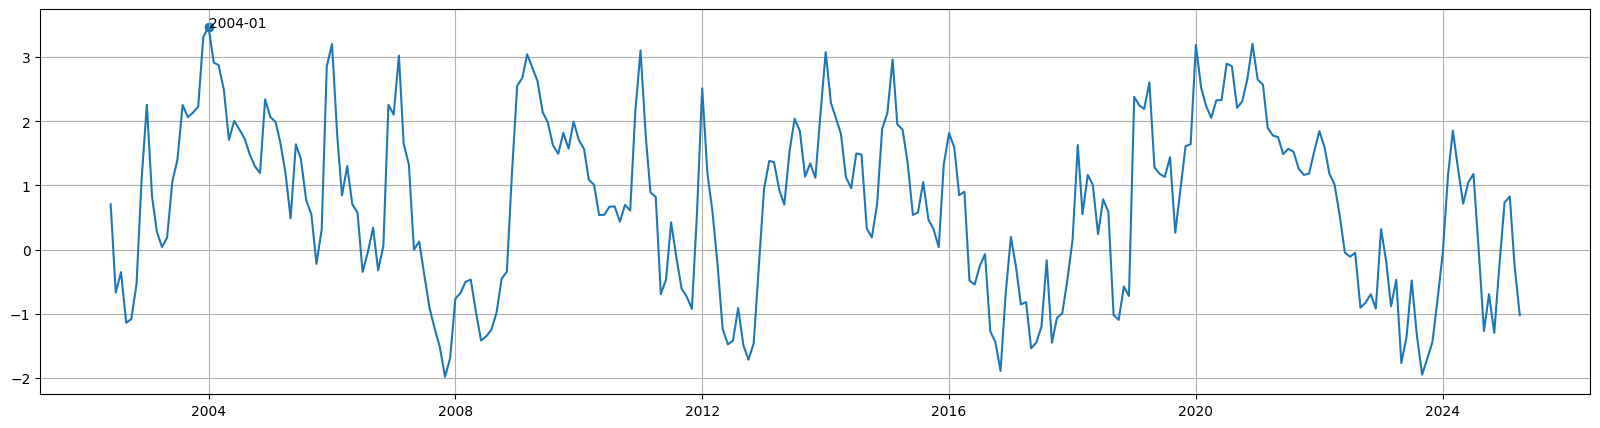

In [250]:
plt.figure(figsize=(20,5))
plt.grid()
plt.scatter(df_result[df_result['I']==df_result['I'].max()].index,df_result['I'].max())
plt.text(df_result[df_result['I']==df_result['I'].max()].index,df_result['I'].max(),str(df_result[df_result['I']==df_result['I'].max()].index)[16:23])
plt.plot(df_result)